In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [2]:
# This is the size of our encoded representation
encoding_dim = 32 # 32 floats => compression of factor 24.5, assuming input is 784 floats

# This is our input placeholder 
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input image to its reconstruction
autoencoder = Model(input=input_img, output=decoded)

In [3]:
# Encoder Model
# this model maps an input to its encoded representation
encoder = Model(input=input_img, output=encoded)

In [4]:
# Decoder Model
# Create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

In [5]:
# Configure model to use per-pixel binary crossentropy loss
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [7]:
# Normalize and flatten
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape

(60000, 784)
(10000, 784)


In [8]:
np.savetxt("mnist_x_train", x_train)

In [9]:
np.savetxt("mnist_x_test", x_test)

In [10]:
autoencoder.fit(x_train, x_train, nb_epoch=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s - loss: 0.3839 - val_loss: 0.2731
Epoch 2/50
60000/60000 [==============================] - 3s - loss: 0.2664 - val_loss: 0.2562
Epoch 3/50
60000/60000 [==============================] - 2s - loss: 0.2461 - val_loss: 0.2337
Epoch 4/50
60000/60000 [==============================] - 2s - loss: 0.2259 - val_loss: 0.2158
Epoch 5/50
60000/60000 [==============================] - 2s - loss: 0.2103 - val_loss: 0.2023
Epoch 6/50
60000/60000 [==============================] - 2s - loss: 0.1985 - val_loss: 0.1921
Epoch 7/50
60000/60000 [==============================] - 2s - loss: 0.1894 - val_loss: 0.1840
Epoch 8/50
60000/60000 [==============================] - 2s - loss: 0.1820 - val_loss: 0.1772
Epoch 9/50
60000/60000 [==============================] - 2s - loss: 0.1757 - val_loss: 0.1714
Epoch 10/50
60000/60000 [==============================] - 2s - loss: 0.1702 - val_loss: 0.1662

In [11]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

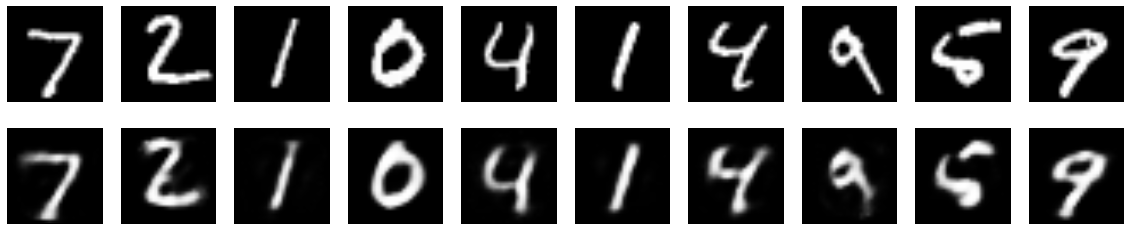

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
textfile = np.loadtxt("spark_sigmoid.txt/part-00000", dtype=str, delimiter=',')

In [29]:
new_array = []
for datapoint in textfile:
    new_list = []
    for i in xrange(len(datapoint)):
        string = datapoint[i]
        while(string[0] == '['):
            string = string[1:]
        while(string[-1] == ']'):
            string = string[:-1]
        new_list.append(float(string.replace('E', 'e')))
    new_array.append(new_list)

In [ ]:
sparkAE = np.asarray(new_array)

In [33]:
x_test

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)